# Trabalho: Proposta de Mineração de Dados

**Intruções iniciais**

UTILIZANDO OS DADOS DISPONIBILIZADOS NO ARQUIVO (DATASET: SINAISVITAIS003 100DIAS DV2 XXXX.TXT , ONDE xxxx INDICA O PRIMEIRO DÍGITO DO SEU RA – DA DIREITA PARA A ESQUERDA), APRESENTE UMA PROPOSTA DE MINERAÇÃO DE DADOS UTILIZANDO OS ELEMENTOS DE ESTATÍSTICAS DESENVOLVIDOS EM CLASSE.

UMA DAS PRIMEIRAS ETAPAS DA MINERAÇÃO DE DADOS É A PREPARAÇÃO DA BASE DE DADOS. OBSERVE NOS GRÁFICOS ABAIXO QUE OS DADOS POSSUEM ALGUMAS ANOMALIAS OU VALORES ESPÚRIOS OU RUÍDOS, QUE DEVEM SER REMOVIDAS. OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL SÃO OS SEGUINTES:

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

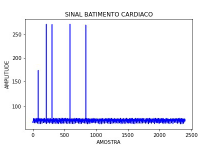 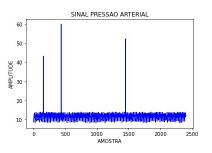 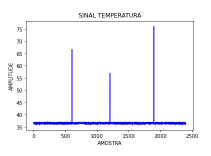

**Início da solução do problema.**

In [1]:
# Importação das Bibliotecas
import os
import csv
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Definição de constantes

In [2]:
media_literal: str = "Média"
mediana_literal: str = "Mediana"
moda_literal: str = "Moda"
desvio_padrao_literal: str = "Desvio Padrão"
batimento_literal: str = "BATIMENTO"
temperatura_literal: str = "TEMPERATURA"
pressao_literal: str = "PREASSAO"
batimento_cardiaco_literal: str = "Batimento Cardíaco"
pressao_arterial_literal: str = "Pressão Arterial"
temperatura_corporal_literal: str = "Temperatura Corporal"
hora_literal: str = "HORA"

**1)** DESENVOLVER UM PROCEDIMENTO PARA EFETUAR A PREPARAÇÃO DOS DADOS – GERALMENTE OS VALORES FORA DA FAIXA DE ANÁLISE PADRÃO SÃO “REMOVIDOS”/”SUBSTITUÍDOS” POR UM VALOR MÉDIO ENTRE O VALOR ANTECESSOR E POSTERIOR. DESENVOLVER O SOFTWARE EM PYTHON.

**Comentário:** O arquivo com a base de dados escolhido foi o "sinaisvitais003 100dias DV2 RAxxx4".

In [3]:
# ============================= LEITURA DOS DADOS =============================
dados = []

path = os.getcwd()+os.sep+"sinaisvitais003 100dias DV2 RAxxx4.txt"
with open(path,'r',newline='') as ARQUIVO:
    d = csv.reader(ARQUIVO)
    dd = list(d)
    for i in range(0,len(dd)):
        p = dd[i][0]  
        palavras = p.split("\t")
        dados.append({"HORA":palavras[0],batimento_literal:palavras[1],
                      pressao_literal:palavras[2],temperatura_literal:palavras[3]})

# Criar o DataFrame Inicial
df0 = pd.DataFrame(data = dados, dtype=float)

# Criar o DataFrame Final
df = pd.DataFrame(data = dados, dtype=float)

**Preparação dos Dados:** o script a seguir tem a finalidade de eliminar os valores fora dos intervalos abaixo (intervalo padrão dos sinais vitais). 

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

In [4]:
# ================================= Batimento =================================
# Excluir valores fora da faixa
#df = df.loc[df[batimento_literal] <= 100]

# Substituir pela média global de cada uma das métricas
for j in range(len(dd)):
    if (df[batimento_literal][j] > 100) | (df[batimento_literal][j] < 0):
        df[batimento_literal].replace(df[batimento_literal][j], np.NaN, inplace=True)

    if (df[pressao_literal][j] > 20) | (df[pressao_literal][j] < 0):
        df[pressao_literal].replace(df[pressao_literal][j], np.NaN, inplace=True)

    if (df[temperatura_literal][j] > 40) | (df[temperatura_literal][j] < 0):
        df[temperatura_literal].replace(df[temperatura_literal][j], np.NaN, inplace=True)

df[batimento_literal].fillna(df[batimento_literal].median(), inplace=True)
df[pressao_literal].fillna(df[pressao_literal].median(), inplace=True)
df[temperatura_literal].fillna(df[temperatura_literal].median(), inplace=True)


**Plotagem dos sinais vitais, e dos histogramas dos dados após serem tratados.**

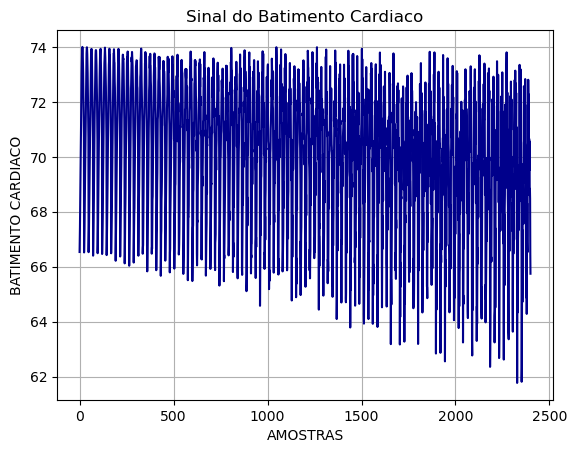

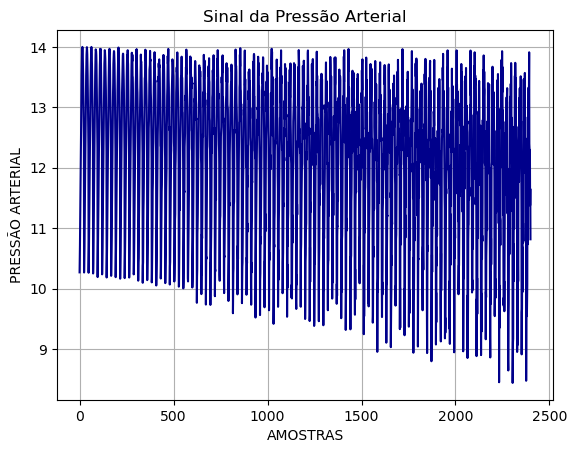

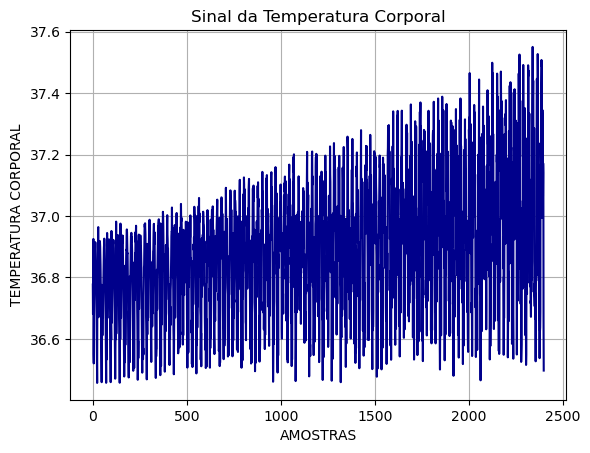

In [5]:
# Plotar o sinal do batimento cardíaco
plt.plot(df[batimento_literal],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df[pressao_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df[temperatura_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

**Diante disso, convém dizer que os sinais vitais, e os histogramas dos dados antes do tratamento podem ser observados no Apêndice deste trabalho.**

**Confirmar se a base de dados foi preparada corretamente após o tratamento realizado anteriormente:** o script a seguir verifica, na base de dados, se há algum valor faltante, ou fora do intervalo abaixo.

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

In [6]:
# Verificar se há valores faltantes
print("\nQuantidade de valores faltantes:")
print(df.isnull().sum())

# Valores fora da faixa de análise padrão
valores_fora = pd.DataFrame()
# Contar valores fora da faixa, e inserir em um DataFrame
valores_fora[''] = [batimento_literal,'Pressão',temperatura_literal]
valores_fora['Valores abaixo da faixa'] = [sum(i <= 0 for i in df[batimento_literal]),
                                           sum(i <= 0 for i in df[pressao_literal]),
                                           sum(i <= 0 for i in df[temperatura_literal])]

valores_fora['Valores acima da faixa'] = [sum(i >= 100 for i in df[batimento_literal]),
                                          sum(i >= 20 for i in df[pressao_literal]),
                                          sum(i >= 40 for i in df[temperatura_literal])] 

valores_fora['Total'] = valores_fora['Valores abaixo da faixa'] + valores_fora['Valores acima da faixa']
                                     
print("\nQuantidade de valores fora da faixa:")
print(valores_fora.to_string(index = False))



Quantidade de valores faltantes:
HORA           0
BATIMENTO      0
PREASSAO       0
TEMPERATURA    0
dtype: int64

Quantidade de valores fora da faixa:
             Valores abaixo da faixa  Valores acima da faixa  Total
  BATIMENTO                        0                       0      0
    Pressão                        0                       0      0
TEMPERATURA                        0                       0      0


**Conclusão:** Conforme o esperado, após a preparação dos dados, a base de dados contida no arquivo "sinaisvitais003 100dias DV2 RAxxx4" não possui nenhum valor faltante e, todos os valores estão dentro do intervalo padrão.

**2)** CONSIDERANDO-SE QUE O PACOTE PADRÃO DE DADOS CONTÉM 24 AMOSTRAS COLETADAS A CADA HORA, APLIQUE A CORRELAÇÃO, PARA CADA UM DOS PARÂMETROS (O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL), PROCURE IDENTIFICAR PADRÕES DE COMPORTAMENTOS NOS VALORES AMOSTRADOS. ATENÇÃO, É PRECISO SEGMENTAR O ARQUIVO EM PACOTES MENORES COM 24 AMOSTRA CADA, OU SEJA, DIVIDA O ARQUIVO EM PACOTES COM 24 AMOSTRA CADA E APLIQUE AS FERRAMENTAS ESTATÍSTICAS. DESENVOLVER O SOFTWARE EM PYTHON.

In [7]:
# Correlação dos 100 dias de coleta de dados
n = 1

df_correlacao = pd.DataFrame()

c_BATIMENTOxPRESSAO = []
c_BATIMENTOxTEMPERATURA = []
c_TEMPERATURAxPRESSAO  = []

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):
    
    # Cálculo da correlação de cada pacote de dados
    correlacao = df[k:k+24].corr(method ='pearson')

    c_BATIMENTOxPRESSAO.append(correlacao[batimento_literal][2])
    c_BATIMENTOxTEMPERATURA.append(correlacao[batimento_literal][3])
    c_TEMPERATURAxPRESSAO.append(correlacao[temperatura_literal][2])

df_correlacao['Batimento x Pressão'] = c_BATIMENTOxPRESSAO
df_correlacao['Batimento x Temperatura'] = c_BATIMENTOxTEMPERATURA
df_correlacao['Temperatura x Pressão'] = c_TEMPERATURAxPRESSAO

print(df_correlacao)

    Batimento x Pressão  Batimento x Temperatura  Temperatura x Pressão
0              1.000000                 0.391996               0.391996
1              0.999963                 0.301002               0.300423
2              0.999904                 0.538682               0.539733
3              0.999722                 0.554257               0.555694
4              0.999626                 0.454708               0.448698
..                  ...                      ...                    ...
95             0.833688                 0.640967               0.643865
96             0.810722                 0.698221               0.816937
97             0.817140                 0.489538               0.537313
98             0.840495                 0.612371               0.675077
99             0.709203                 0.759887               0.612879

[100 rows x 3 columns]


**Conclusão:**

**3)** A CORRELAÇÃO PODE SER APLICADA INDIVIDUALMENTE PARA CADA UM DOS PARÂMETROS APRESENTADOS, CONTUDO, VOCÊ PODE APLICAR A CORRELAÇÃO EM DOIS PARÂMETROS SIMULTANEAMENTE PARA A IDENTIFICAÇÃO DE PADRÕES ? POR EXEMPLO, DADO UM PERÍODO DE TEMPO, RESPEITANDO O TAMANHO DO PACOTE DE DADOS E A AMOSTRAGEM, PODE-SE UTILIZAR OS VALORES DE CORRELAÇÃO ENTRE BATIMENTOS CARDÍACOS E PRESSÃO ARTERIAL PARA COMPOR UM NOVO PADRÃO DE APRENDIZADO? AVALIE ESTA QUESTÃO - APRESENTE UMA SOLUÇÃO/RESOLUÇÃO. DESENVOLVER O SOFTWARE EM PYTHON.

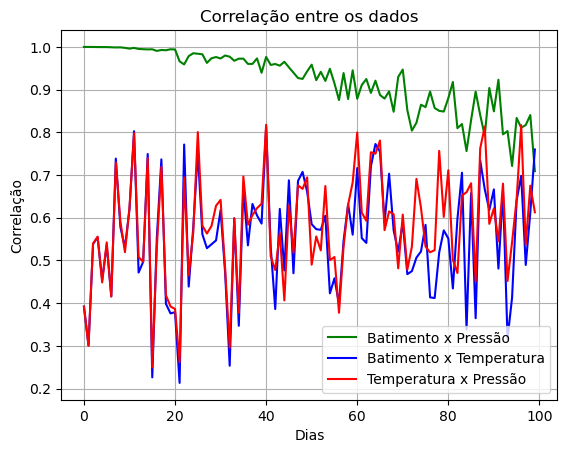

In [8]:
# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Correlação entre os dados")
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.plot(c_BATIMENTOxPRESSAO, color = 'g', label = 'Batimento x Pressão')
plt.plot(c_BATIMENTOxTEMPERATURA, color = 'b', label = 'Batimento x Temperatura')
plt.plot(c_TEMPERATURAxPRESSAO, color = 'r', label = 'Temperatura x Pressão')
plt.legend()

**Conclusão:**

**4)** DIVIDA O ARQUIVO DE DADOS, PARA CADA PARÂMETRO, EM PACOTES COM 24 AMOSTRAS, CORRESPONDENDO A UM DIA DE AMOSTRAGEM. PARA CADA PACOTE AVALIADO, PODE-SE APLICAR FERRAMENTAL ESTATÍSTICO DESCRITIVO: MÉDIA, MEDIANA, MODA, DESVIO PADRÃO E HISTOGRAMA, PARA AUXILIAR NO PROCESSO DE MINERAÇÃO DE DADOS ? PARA CADA PACOTE, CALCULE: MÉDIA, MEDIANA, MODA E DESVIO PADRÃO, PROCURE ESTABELECER CRITÉRIOS PARA TOMADA DE DECISÃO, POR EXEMPLO, SE O VALOR DO BATIMENTO CARDÍACO MÉDIO E DA PRESSÃO ARTERIAL MÉDIA ESTIVEREM ACIMA DE UM DETERMINADO VALOR, APRESENTE UMA MENSAGEM DE ATENÇÃO OU UM ALARME DE EMERGÊNCIA. DESENVOLVER O SOFTWARE EM PYTHON.

**Estatística Descritiva do problema, e Histograma:** O script a seguir tem a finalidade de calcular a Média, Mediana, Moda, Desvio Padrão e, plotar os Histogramas dos sinais vitais, isto é, Batimento Cardiaco, Pressão Arterial, e Temperatura Corporal.

Estatística do Batimento Cardíaco
        Média    Mediana       Moda  Desvio Padrão
0   71.356588  72.000000  70.694593       2.415405
1   71.332927  71.969427  66.519773       2.415998
2   71.309134  71.943245  66.529782       2.414659
3   71.266352  71.921010  66.402590       2.413103
4   71.261917  71.929026  66.491792       2.413285
..        ...        ...        ...            ...
95  68.803703  69.332842  64.710886       2.784849
96  69.516879  69.728628  64.638940       2.558978
97  68.909026  69.016071  61.771107       2.905336
98  68.635939  69.090365  61.812786       3.028324
99  68.632318  68.715936  65.339036       2.505884

[100 rows x 4 columns]
Estatística da Pressão Arterial
        Média    Mediana       Moda  Desvio Padrão
0   12.678294  13.000000  12.347296       1.207703
1   12.668614  12.996974  10.265532       1.207443
2   12.660945  12.990466  10.261215       1.207671
3   12.647603  12.945582  10.249249       1.208148
4   12.643528  12.987037  10.189739       1

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

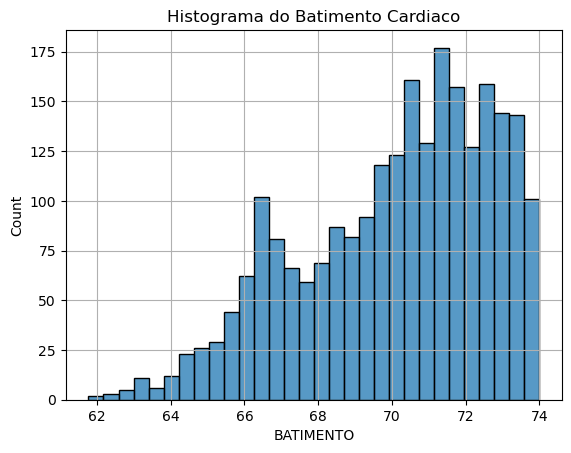

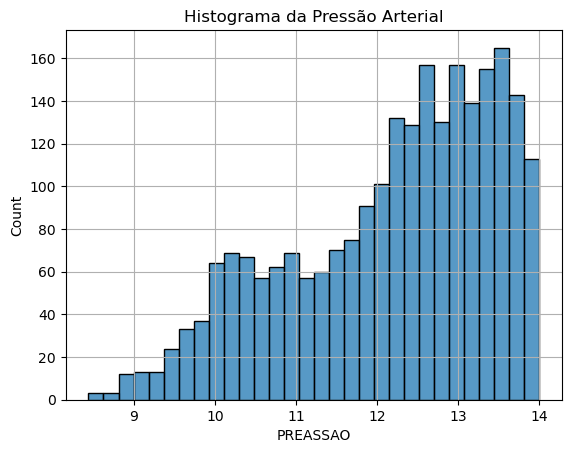

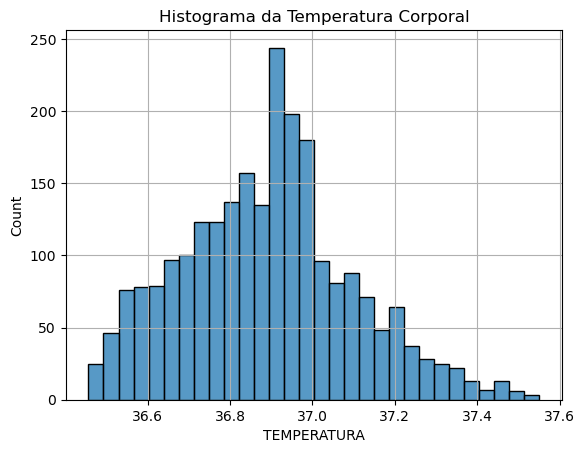

In [9]:
# ==================== ESTATÍSTICA DESCRITIVA DO PROBLEMA =====================
estatistica_Batimento = pd.DataFrame()
estatistica_Pressao = pd.DataFrame()
estatistica_Temperatura = pd.DataFrame()

media = np.zeros((100,3))
madiana = np.zeros((100,3))
moda = np.zeros((100,3))
desvio_padrao = np.zeros((100,3))
p: int = 0

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):

    # Cálculo da média, madiana, e devio padrão
    aux = df[k:k+24].describe()

    media[p][0] = aux[batimento_literal][1]
    media[p][1] = aux[pressao_literal][1]
    media[p][2] = aux[temperatura_literal][1]
    
    madiana[p][0] = aux[batimento_literal][5]
    madiana[p][1] = aux[pressao_literal][5]
    madiana[p][2] = aux[temperatura_literal][5]
    
    desvio_padrao[p][0] = aux[batimento_literal][2]
    desvio_padrao[p][1] = aux[pressao_literal][2]
    desvio_padrao[p][2] = aux[temperatura_literal][2]
    
    moda[p][0] = statistics.mode(df[batimento_literal][k:k+24])
    moda[p][1] = statistics.mode(df[pressao_literal][k:k+24])
    moda[p][2] = statistics.mode(df[temperatura_literal][k:k+24])
    
    p = p + 1
    
estatistica_Batimento[media_literal] = media[:,0]
estatistica_Batimento[mediana_literal] = madiana[:,0]
estatistica_Batimento[moda_literal] = moda[:,0]
estatistica_Batimento[desvio_padrao_literal] = desvio_padrao[:,0]

estatistica_Pressao[media_literal] = media[:,1]
estatistica_Pressao[mediana_literal] = madiana[:,1]
estatistica_Pressao[moda_literal] = moda[:,1]
estatistica_Pressao[desvio_padrao_literal] = desvio_padrao[:,1]

estatistica_Temperatura[media_literal] = media[:,2]
estatistica_Temperatura[mediana_literal] = madiana[:,2]
estatistica_Temperatura[moda_literal] = moda[:,2]
estatistica_Temperatura[desvio_padrao_literal] = desvio_padrao[:,2]

print("Estatística do Batimento Cardíaco")
print(estatistica_Batimento)
print("Estatística da Pressão Arterial")
print(estatistica_Pressao)
print("Estatística da Temperatura Corporal")
print(estatistica_Temperatura)

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data = df, x = batimento_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data = df, x = pressao_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data=df, x = temperatura_literal, bins = 30)

**Tomada de Decisão:** De acordo com a literatura, o diagnóstico de uma pessoa com base nos sinais vitais, enquanto ela estiver em repouso, deve seguir as seguintes instruções.

**Batimento Cardíaco**:

Quando procurar atendimento de emergência?

Tanto acelerados quanto lentos, os batimentos cardíacos podem ser sinal de alterações graves no coração. Assim, demandam rapidez no atendimento.  

Considera-se batimento cardíaco acelerado quando a pessoa tem mais de 100 batimentos por minuto. Se for um episódio de início agudo e duradouro, associado ou não com sintomas como fraqueza, tontura, desmaios e falta de ar, a pessoa deve procurar atendimento médico de emergência. Se o episódio durar poucos minutos, deve marcar consulta com cardiologista.

É considerado batimento cardíaco lento quando a pessoa tem menos de 60 batimentos por minuto. Essa medição deve ser realizada através do pulso, aparelho de pressão arterial (esfigmomanômetro), oxímetro (aparelho que detecta nível de oxigênio e também batimentos) ou relógio de pulso com detecção de batimentos. Se for episódio de início agudo associado a tontura, fraqueza ou desmaios, deve-se procurar atendimento de emergência. Caso não apresente sintomas associados, deve-se marcar consulta com cardiologista para investigação.

**Referência:** Proven Cordis: Clínica Médica. O que é arritmia e quando se preocupar. Disponível em: <https://prevencordis.com.br/blog/arritmia/#:~:text=Considera%2Dse%20batimento%20card%C3%ADaco%20acelerado,procurar%20atendimento%20m%C3%A9dico%20de%20emerg%C3%AAncia.>. Acesso em: 12 de Abril de 2023;

**Pressão Arterial:**

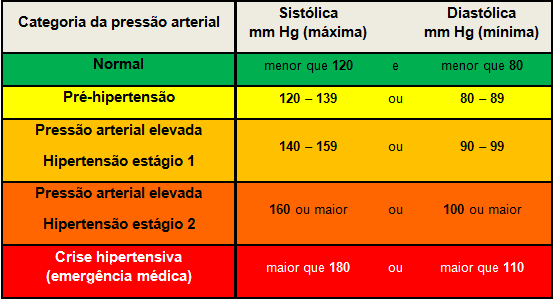

**Referência:** CISA: Centro de Informações sobre Saúde e Álcool. Hipertensão e uso excessivo de álcool. Disponível em: <https://cisa.org.br/sua-saude/informativos/artigo/item/64-hipertensao-e-uso-excessivo-de-alcool>. Acesso em: 12 de Abril de 2023;

**Temperatura Corporal:**

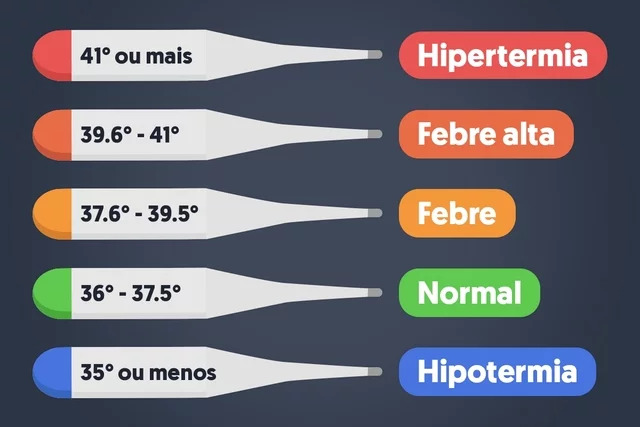

**Referência:** Express Remoções. Quantos Graus é Febre Alta? Como Medir a Temperatura. Disponível em: <https://www.expressremocoes.com.br/bem-estar/quantos-graus-e-febre-como-medir-a-temperatura/>. Acesso em: 12 de Abril de 2023;

Diante disso, o script a seguir tem a finalidade de analisar os dados do arquivo "sinaisvitais003 100dias DV2 RAxxx4", e realizar um diagnóstico de acordo com as instruções anteriores. 

In [10]:
diagnostico = pd.DataFrame()
d: list[str] = []
# Diagnóstico do Batimento Cardíaco
for m in estatistica_Batimento[media_literal]:
    
    if (m < 60): d.append("Preocupante: Batimento Cardíaco Lento.")
    elif ((m > 60) and (m < 100)): d.append("Normal.")
    else: d.append("Preocupante: Batimento Cardíaco Rápido.")

diagnostico[batimento_cardiaco_literal] = d

d.clear()

# Diagnóstico da Pressão Arterial
for m in estatistica_Pressao[media_literal]:
    
    if (m < 9): d.append("Pressão Baixa")
    elif ((m >= 9) and (m <= 12)): d.append("Normal")
    elif ((m > 12) and (m < 14)): d.append("Pré-Hipertensão")
    elif ((m >= 14) and (m < 16)): d.append("Hipertensão Estágio 1")
    elif ((m >= 16) and (m < 18)): d.append("Hipertensão Estágio 2")
    elif (m >= 18): d.append("Crise Hipertensiva")

diagnostico[pressao_arterial_literal] = d

d.clear()

# Diagnóstico da Temperatura Corporal
for m in estatistica_Temperatura[media_literal]:
    
    if (m < 35): d.append("Hipotermia")
    elif ((m > 35) and (m <= 37.7)): d.append("Normal")
    elif ((m > 37.7) and (m <= 39.5)): d.append("Febre")
    elif ((m > 39.5) and (m <= 41)): d.append("Febre Alta")
    elif (m > 41): d.append("Hipertemia")

diagnostico[temperatura_corporal_literal] = d

d.clear()

print("\n*************************************************************\n")
print("Diagnóstico: \n")
print("Batimento Cardíaco: ", statistics.mode(diagnostico[batimento_cardiaco_literal]))
print("Pressão Arterial: ", statistics.mode(diagnostico[pressao_arterial_literal]))
print("Temperatura Corporal: ", statistics.mode(diagnostico[temperatura_corporal_literal]))


*************************************************************

Diagnóstico: 

Batimento Cardíaco:  Normal.
Pressão Arterial:  Pré-Hipertensão
Temperatura Corporal:  Normal


**Conclusão:** As medidas dos sinais vitais foram coletadas de hora em hora, durante 100 dias. Nesse sentido, com base no valor médio destes indicadores em cada um dos dias, foi possível fazer um diagnóstico diário. Com isso, aplicou-se o conceito de moda nos 100 dias para concluir o diagnóstico e, por esta metodologia, obteve-se o resultado anterior.

**Apêndice:** Plotagem dos Sinais e dos Histogramas dos Dados antes da preparação.

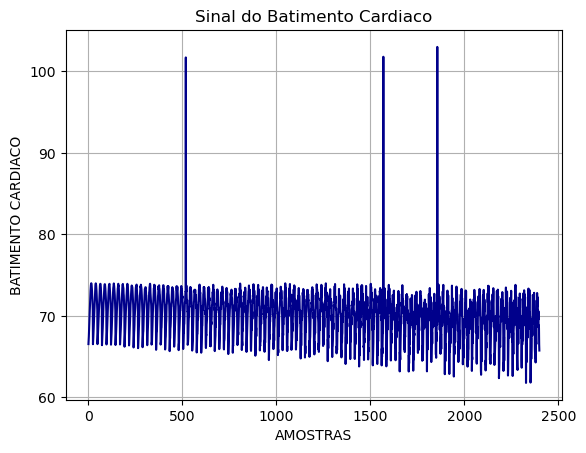

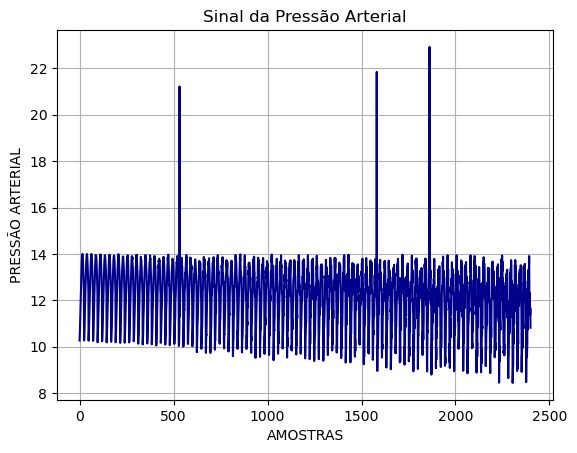

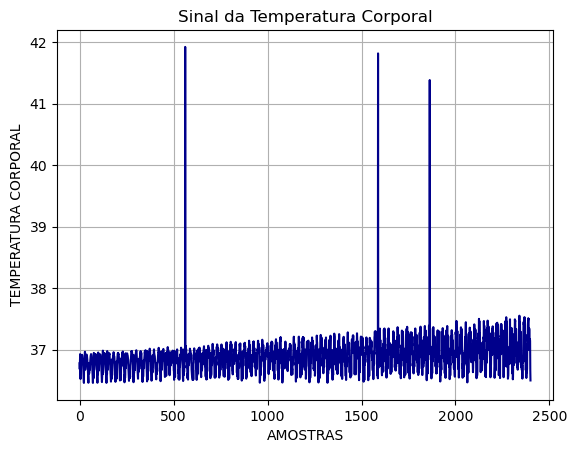

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

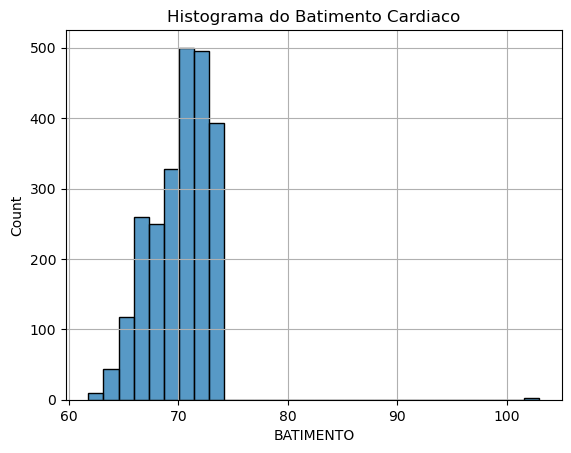

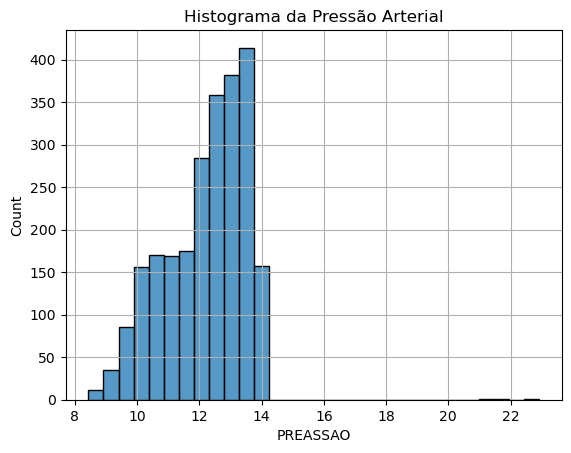

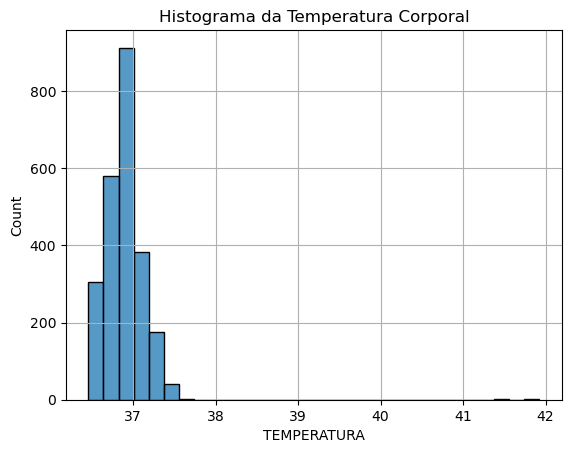

In [11]:
# Plotar o sinal do batimento cardíaco
plt.plot(df0[batimento_literal],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df0[pressao_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df0[temperatura_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data = df0, x = batimento_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data = df0, x = pressao_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data = df0, x = temperatura_literal, bins = 30)